In [4]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
#from keras.models import Sequential
from keras.applications import VGG16 
from keras.models import VGG16 
from keras.layers import Activation, Dense,Flatten
from keras.preprocessing.image import load_img, img_to_array
import cv2


ImportError: cannot import name 'VGG16'

In [5]:
#the path of images on disk
TRAIN_DIR='/home/tasneem/Downloads/PH2.16/train'
VALID_DIR='/home/tasneem/Downloads/PH2.16/valid/'
TEST_DIR='/home/tasneem/Downloads/PH2.16/test/'
IMAGE_SIZE=224



train_batches= ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(TRAIN_DIR,
                                                 target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                 batch_size = 40,
                                                class_mode='categorical')
valid_batches= ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(VALID_DIR,target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                 batch_size = 5,
                                                class_mode='categorical')
test_batches= ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(TEST_DIR, target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                 batch_size = 5,
                                                class_mode='categorical')



def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
      if type(ims[0]) is np.ndarray:
            ims= np.array(ims).astype(np.uint8)
            if (ims.shape[-1] != 3):
                ims = ims.transpose((0,2,3,1))
            f = plt.figure(figsize=figsize)
            cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
            for i in range(len(ims)):
                sp=f.add_subplot(rows, cols, i+1)
                sp.axis('Off')
                if titles is not None:
                    sp.set_title(titles[i], fontsize=16)
            plt.imshow(ims[i], interpolation=None if interp else 'none')
            
imgs, labels = next(train_batches)

Found 160 images belonging to 3 classes.
Found 20 images belonging to 3 classes.
Found 20 images belonging to 3 classes.


In [6]:
vgg16_model=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
model = Sequential()

In [7]:
for layer in vgg16_model.layers:
    model.add(layer)

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [9]:
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.layers[0].trainable = False


In [10]:
model.compile(loss="categorical_crossentropy",
			  optimizer="adam",
			  metrics=["accuracy"])

#optimizer='sgd'

Epoch 1/30
3/3 [==============================] - 2s 529ms/step - loss: 8.5963 - acc: 0.4667 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 2/30
3/3 [==============================] - 2s 506ms/step - loss: 8.8650 - acc: 0.4500 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 3/30
3/3 [==============================] - 2s 506ms/step - loss: 9.6709 - acc: 0.4000 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 4/30
3/3 [==============================] - 2s 508ms/step - loss: 10.0738 - acc: 0.3750 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 5/30
3/3 [==============================] - 2s 505ms/step - loss: 8.9993 - acc: 0.4417 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 6/30
3/3 [==============================] - 2s 506ms/step - loss: 8.9993 - acc: 0.4417 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 7/30
3/3 [==============================] - 2s 515ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 8/30
3/3 [==============================] - 2s 537ms/step - loss: 7.9247 - acc: 0

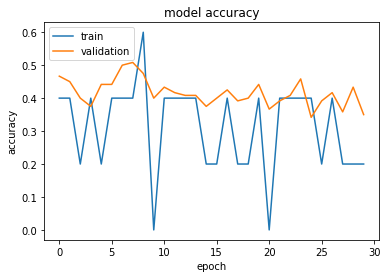

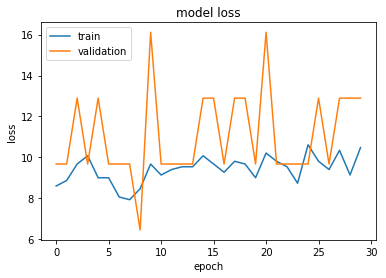

In [15]:
# fit the model
history = model.fit_generator(train_batches, 
				 	steps_per_epoch=3,
				 	epochs=30,
					validation_data=valid_batches,
					validation_steps=1,
					)
#epochs=5,verbose=2

# list all data in history
print(history.history.keys())

plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

